![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [9]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


### Task

Perform a cluster analysis based on a reasonable number of clusters and collect the average values for the clusters. The output should be a DataFrame named stat_penguins with one row per cluster that shows the mean of the original variables (or columns in "penguins.csv") by cluster. stat_penguins should not include any non-numeric columns.

In [10]:
penguins_df['sex'].value_counts()

MALE      167
FEMALE    165
Name: sex, dtype: int64

In [11]:
# Let's start by 
penguins_df['sex'].replace(['MALE', 'FEMALE'],
                        [0, 1], inplace=True)

penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1
3,36.7,19.3,193.0,3450.0,1
4,39.3,20.6,190.0,3650.0,0


In [12]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 13.1 KB


In [13]:
# Now we need to normalize the variables
scaler = StandardScaler()

# Fit and transform the data
normalized_data = scaler.fit_transform(penguins_df)
normalized_data

array([[-0.90390586,  0.79035987, -1.42534179, -0.56694801, -0.99399394],
       [-0.83043377,  0.12618674, -1.0685765 , -0.50484747,  1.00604235],
       [-0.68348959,  0.43272819, -0.42639899, -1.18795343,  1.00604235],
       ...,
       [ 1.17168063, -0.74234736,  1.50013355,  1.91707363, -0.99399394],
       [ 0.21654349, -1.20215952,  0.78660298,  1.23396768,  1.00604235],
       [ 1.07984052, -0.53798639,  0.85795603,  1.48236985, -0.99399394]])

In [14]:
from sklearn.metrics import silhouette_score

# Creating a KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(normalized_data)
score = silhouette_score(normalized_data, kmeans.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.451


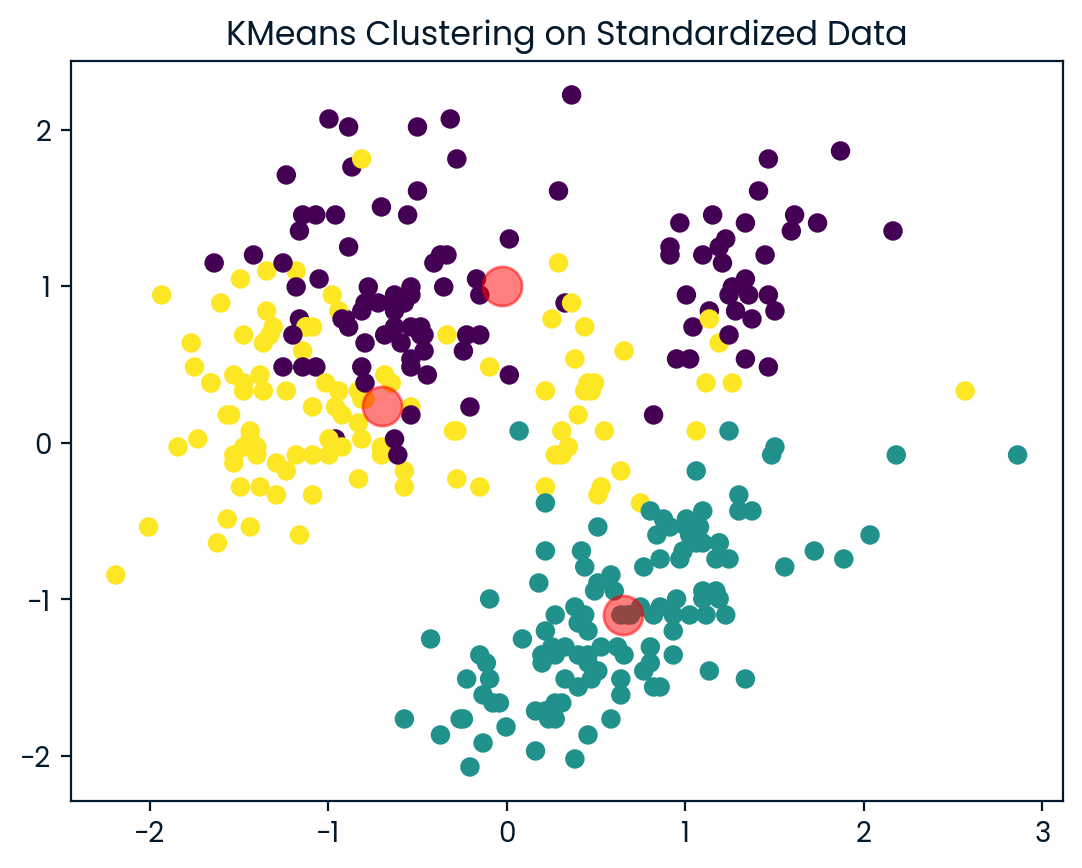

In [15]:
# Visualizing the clusters
plt.scatter(normalized_data[:,0], normalized_data[:,1], c=y_kmeans, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=0.5)
plt.title('KMeans Clustering on Standardized Data')
plt.show()


In [16]:
# Not very good, lets try another approach
# Do we have missing values that we need to input?
penguins_df.isnull().sum(axis = 0)

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [17]:
# Removing the non-numeric 'sex' column for clustering
penguins_numeric = penguins_df.drop('sex', axis=1)

# Scaling the features
scaler = StandardScaler()
penguins_scaled = scaler.fit_transform(penguins_numeric)
penguins_scaled

array([[-0.90390586,  0.79035987, -1.42534179, -0.56694801],
       [-0.83043377,  0.12618674, -1.0685765 , -0.50484747],
       [-0.68348959,  0.43272819, -0.42639899, -1.18795343],
       ...,
       [ 1.17168063, -0.74234736,  1.50013355,  1.91707363],
       [ 0.21654349, -1.20215952,  0.78660298,  1.23396768],
       [ 1.07984052, -0.53798639,  0.85795603,  1.48236985]])

In [18]:
kmeans = KMeans(n_clusters=3, random_state=10)
penguins_df['Cluster'] = kmeans.fit_predict(penguins_scaled)

# Analyzing the clusters
stat_penguins = penguins_df.groupby('Cluster').mean()
print(stat_penguins)

         culmen_length_mm  culmen_depth_mm  ...  body_mass_g       sex
Cluster                                     ...                       
0               38.305469        18.098437  ...  3587.500000  0.609375
1               47.568067        14.996639  ...  5092.436975  0.487395
2               47.662353        18.748235  ...  3898.235294  0.341176

[3 rows x 5 columns]
